# 有限要素法のためのPython入門


## はじめに

本日紹介するライブラリはオブジェクト指向の考え方を基に作成されています。
今日勉強する内容はすべてオブジェクトに関するものです。
オブジェクトとは以下の図に示すようにプロパティとメソッドが基になっています。
<img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Oop-uml-class-example.png">
現在変数に格納されているものが何であるかは<変数>?と入力することで参照可能です。


## 紹介する機能について

PythonにはNumpy/Matplotlib/Scipy/Getfem++などのパッケージがあり、それらを組み合わせることにより容易に有限要素法のスクリプトを組むことができます。それぞれのパッケージに関しては各Wikipediaの内容を確認してください。

Numpy (https://ja.wikipedia.org/wiki/NumPy)

Matplotlib(https://ja.wikipedia.org/wiki/Matplotlib)

Scipy (https://ja.wikipedia.org/wiki/SciPy)

Getfem++ (https://ja.wikipedia.org/wiki/Getfem%2B%2B)

それぞれのパッケージはPythonでは以下のように呼び出します。

In [ ]:
import numpy as np

これで、これらのパッケージはそれぞれ、np/sp/gf/pltとしてインポートされました。
各パッケージの機能は<module>.の後にタブキーを打つことで実行可能な関数などが表示されます。

In [ ]:
np.

In [ ]:
np?

## Numpyの学習 〜 密行列による線形解析〜

本節ではNumpyのチュートリアル

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

の内容を解説します。

### 配列の作成
numpyを使用する利点としては多次元配列の操作が容易になることがあげられます。 numpyの配列のクラスはndarrayと呼ばれています。ndarrayの主なプロパティには主に以下のものがあります。


<img src="http://docs.scipy.org/doc/numpy-1.10.0/_images/threefundamental.png">

#### ndarray.ndim
配列の次元

#### ndarray.shape
配列の形状。n行m列の行列については、 形状 （M、N）となります 。

#### ndarray.size
配列の要素数の合計。

#### ndarray.dtype
配列の要素のタイプ。numpy.int32、numpy.int16、およびnumpy.float64などがあります。

#### ndarray.itemsize
配列の各要素のサイズ（バイト単位）。 

#### ndarray.data
配列の実際の要素を含むバッファー。 インデックスで配列の要素にアクセスするため、このプロパティを使用する必要はありません。


#### 例

実際に配列を定義してみます。例えば、ベクトル$b = \left\{ \begin{array}{c}6\\7\\8\end{array}\right\}$と$A=\left[\begin{array}{ccc}
1 & 2 & 0\\
2 & 5 & 6\\
0 & 6 & 9
\end{array}\right]$の行列を定義したい場合には次のように定義します。

In [ ]:
b = np.array([6, 7, 8])
A = np.array([[1, 2, 0],[2, 5, 6],[0, 6, 9]])
# bを出力します
print "b ="
print b
# Aを出力します
print "A ="
print A

np.arrayについて詳細を確認したい場合は次のようにコマンドを入力します。

In [ ]:
np.array?

このコマンドを入力するとコマンドの呼び出し方法・目的・パラメータの説明が出てきます。
詳細説明から分かるようにarrayには先ほど指定したobject以外にも引数があります。この引数のなかで"引数="となっているものはデフォルト引数と呼ばれ指定されない場合は説明に書かれた値が使用されます。

デフォルト引数を変更したい場合には以下のように指定します。

In [ ]:
A = np.array([[1, 2, 0],[2, 5, 6],[0, 6, 9]], dtype=complex)
print A

dtypeは詳細説明にもあるとおりarrayのデータ型を指定する引数です。これを"dtype=complex"としているため今回は複素数の行列が作成されています。

#### 図の出力

ipoython notebookで2次元の図を出力する場合にはmatplotlibが使われます。

https://ja.wikipedia.org/wiki/Matplotlib

以下のようにモジュールを呼び出します。２行目の"%matplotlib inline"はmatplotlibの図をiPython Notebook内で描写したグラフを展開するためのものです。

In [ ]:
from matplotlib import pylab as plt
%matplotlib inline

In [ ]:
plt.plot(b)

### 線形代数
Numpyの線形代数に関する関数はnp.linalg以下にあります。

In [ ]:
np.linalg?

例えば、先ほど作成した行列$A$の逆行列を計算したい場合はinv関数を使用します。

In [ ]:
np.linalg.inv?

In [ ]:
AA = np.linalg.inv(A)
print AA

Aに対して行列積(np.dot)を行うと以下のように単位行列が作成されます。これにより正しく逆行列が計算されることがわかります。

In [ ]:
np.dot?

In [ ]:
np.dot(A,AA)

また、逆行列だけでなく固有値解析の実行も可能です。

In [ ]:
a, V = np.linalg.eig(A)
# 固有値を出力します
print "固有値="
print a
# 固有値ベクトル
print "固有ベクトル="
print V
plt.plot(V[:,0])
plt.plot(V[:,1])

## Scipyの学習〜疎行列による線形代数〜

ScipyはNumPyを基盤にした科学計算ライブラリです。本節ではScipyのチュートリアル

http://docs.scipy.org/doc/scipy/reference/tutorial/

の内容のうち、疎行列による線形代数関係のライブラリの説明をします。

In [ ]:
import numpy as np
from scipy import sparse

In [ ]:
sparse?

Scipyで疎行列を操作する際にはNumpyで使用していたarrayオブジェクトとは別のオブジェクトを使用します。疎行列に使用されているオブジェクトは複数あり、相互に変換可能ですが今回はcoo_matrixオブジェクトを紹介します。

In [ ]:
# A sparse matrix in COOrdinate format
sparse.coo_matrix?

In [ ]:
A = np.array([[1, 2, 0],[2, 5, 6],[0, 6, 9]], dtype=complex)
# 行のインデックス
I = np.array([0,0,1,1,1,2,2])
# 列のインデックス
J = np.array([0,1,0,1,2,1,2])
# 値
V = np.array([1,2,2,5,6,6,9])
A = sparse.coo_matrix((V,(I,J)),shape=(3,3))
print A

以上のように各インデックスに値の入った疎行列が作成されます。また、これらの疎行列はファイルへの保存と読み込みが可能です。

In [ ]:
from scipy import io

In [ ]:
io?

ここではMatrix Market形式(http://math.nist.gov/MatrixMarket/formats.html)
で書き出しを行ってみます。

In [ ]:
from scipy import io

In [ ]:
io.mmwrite("A.mtx", A)

ファイルの中身を出力してみるとMatrix Market形式で正しく出力されていることがわかります。

In [ ]:
%cat A.mtx

また、既存のファイルを読み込んで新しく行列を作成することも可能です。

In [ ]:
B = io.mmread("A.mtx")

In [ ]:
print B

### 疎行列の線形代数

以上では、Pythonによる密行列の線形代数までを紹介してきました。しかしながら、有限要素法計算の際にはメモリ節約のため疎行列計算が行われます。その際にはscipyのsparseパッケージとその下のlinalgパッケージを使用します。

In [ ]:
import scipy as sp
from scipy.sparse import linalg

In [ ]:
linalg?

密行列と同じ操作を疎行列の線形代数パッケージで実行します。

In [ ]:
A  = A.tocsc()
AA = linalg.inv(A)
print AA

密行列の場合は行列積が"*"になりますので注意してください。先ほどと同じように単位行列が逆行列との積で得られます。

In [ ]:
print A*AA

また、固有値解析も少し複雑ですが以下のように計算できます。

In [ ]:
X = sp.rand(A.shape[0], 3)
linalg.lobpcg(A,X)

In [ ]:
sp.rand?

In [ ]:
linalg.lobpcg?

密行列の場合と同じ計算結果になることが確認できます。

## Getfem++の学習

In [ ]:
import getfem as gf

本節ではメッシュ作成とそれを離散化した行列を作成するパッケージGetfem++について説明します。必要となるオブジェクトは以下の図に示すものになります。

<img src="http://download.gna.org/getfem/html/homepage/_images/getfem_structure1.png">

#### Femオブジェクト 
有限要素で何を使用するかを指定する。(ラグランジュ要素Pk、Qkなど)

#### Meshオブジェクト
メッシュの指定(point:節点とconvex:要素などから作られる)

#### Integオブジェクト
積分方法を指定する。

#### MeshFemオブジェクト
メッシュの要素に対してFemを設定したオブジェクト、自由度数などの情報も設定する。

#### MeshImオブジェクト
メッシュの要素に対して積分方法を指定したオブジェクト

#### Assemblyオブジェクト
離散化した行列組み立てのためのオブジェクト。MeshFemとMeshImを基に作成する。

#### Modelオブジェクト
モデル全体の情報を設定するオブジェクト。今回は未使用。


まずは１次元のからのMeshオブジェクトを作成します。

In [ ]:
m = gf.Mesh('empty', 1)

要素(add_convexメソッド)を追加していきます。

In [ ]:
gf.GeoTrans?

In [ ]:
m.add_convex(gf.GeoTrans('GT_QK(1,1)'),[[0,2]])

In [ ]:
m.add_convex(gf.GeoTrans('GT_QK(1,1)'),[[2,4]])

In [ ]:
print m

In [ ]:
mfu = gf.MeshFem(m,1) # 変位用MeshFem
mfd = gf.MeshFem(m,1) # データ用MeshFem

In [ ]:
mfu.set_fem(gf.Fem('FEM_QK(1,1)'))
mfd.set_fem(gf.Fem('FEM_QK(1,1)'))

In [ ]:
gf.Integ?

In [ ]:
im = gf.Integ('IM_GAUSS1D(1)')

In [ ]:
mim = gf.MeshIm(m, im)

In [ ]:
gf.asm_linear_elasticity?

In [ ]:
gf.asm_mass_matrix?

In [ ]:
K = gf.asm_linear_elasticity(mim, mfu, mfd, np.array([1.0, 1.0, 1.0]), np.array([1.0, 1.0, 1.0]))

In [ ]:
print "剛性行列の計算"
print K.full()
M = gf.asm_mass_matrix(mim, mfu)
print "質量行列の計算"
print M.full()

以上により作成した剛性マトリックスと質量マトリックスはSpmatというGetfem++独自の行列オブジェクトで、先ほど紹介したMatrixMarketのフォーマットに出力するメソッドも備えています。

In [ ]:
K?

In [ ]:
K.save('mm', "K.mtx")
M.save('mm', "M.mtx")

In [ ]:
K = io.mmread("K.mtx")
M = io.mmread("M.mtx")

In [ ]:
print "K = "
print K
print "M = "
print M

このようにScipyの疎行列に容易に変換できます。そのため、Scipyを使用した連立方程式の計算や固有値解析を行うことにより有限要素法の解析が可能となります。

In [ ]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

In [ ]:
b += a
b

異なる型の配列で動作している場合、結果の配列の型は、より一般的または正確な1（アップキャストとして知られる動作）に相当します。

In [ ]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,np.pi,3)
b.dtype.name

In [ ]:
c = a+b
c

In [ ]:
c.dtype.name

In [ ]:
d = np.exp(c*1j)
d

In [ ]:
d.dtype.name

そのような配列のすべての要素の合計を計算などの多くの単項演算は、ndarrayクラスのメソッドとして実装されています。

それは関係なく、その形状の、番号のリストであるかのようにデフォルトでは、これらの操作は、アレイに適用されます。 しかし、 軸パラメータを指定することで、あなたは配列の指定した軸に沿って操作を適用することができます。

### ユニバーサル機能

numpyのは、罪、COS、およびEXPなどの使い慣れた数学関数を提供します。 numpyのでは、これらは「ユニバーサル機能」（ufunc）と呼ばれています。 numpyの中では、これらの機能は、出力として、配列を生成する、アレイ上の要素ごとに動作します。

参照してください。:

all , any , apply_along_axis , argmax , argmin , argsort , average , bincount , ceil , clip , conj , corrcoef , cov , cross , cumprod , cumsum , diff , dot , floor , inner , inv , lexsort , max , maximum , mean , median , min , minimum , nonzero , outer , prod , re , round , sort , std , sum , trace , transpose , var , vdot , vectorize , where

### インデックス、スライスと反復処理
一次元配列は、インデックス付きのスライスと同じよう、巡回できないリストや他のPythonシーケンス。

多次元配列は、軸ごとに一つのインデックスを持つことができます。 これらの指標は、カンマで区切られたタプルに記載されています：

少ないインデックスは軸の数より提供されている場合には、不足しているインデックスは、完全なスライスとみなされます。

残りの軸を表すために、必要に応じて：B [i]の中括弧内の式は、以下のように多くのインスタンスが続く私として扱われます。 numpyのは、また、bと 、この使用してドットを書き込むことができます[I、...]。

完全な索引付けタプルを生成するために必要なドット （...）は、のような多くのコロンを表します。 xはランク5アレイである場合たとえば、その後、（すなわち、それは5の軸があります）

* 、[：、：、1,2]×[1,2、...]は 、xと等価です

* X [...]、[3] xに[：、：、：、：、3]と

* X [4、...、5 ,:] xに[4、：、：、5 ,:]。

多次元配列の繰り返し処理は、最初の軸に対して行われます。

In [ ]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

1は、配列の各要素に対して操作を実行したい場合は、1があるフラット属性を使用することができますイテレータ配列のすべての要素の上に：

参照してください。 :

インデックス 、 インデックス （参照）、newaxis、ndenumerate、 インデックス

### 操作形状
#### アレイの形状を変化させる

配列には、各軸に沿った要素の数によって与えられた形状をしています：

配列の形状は、様々なコマンドを使用して変更できます。

ラヴェル（結果の配列内の要素の順序）は、通常は「Cスタイル」である、つまり、右端のインデックスが「最速を変更する」ので、[0,0]、[0,1]である要素の後に。 アレイは、他の形状に整形されている場合は、再び配列は「Cスタイル」として扱われます。 numpyのは、通常はこの順序で格納されている配列を作成するので、ラヴェル（）通常はその引数をコピーする必要はありませんが、配列を別の配列のスライスを取るか、異常なオプションを使用して作成することによって行われた場合、それをコピーする必要があるかもしれません。 関数）（ラヴェル）と（再形成も左端のインデックスは最速を変更するには、Fortran形式の配列を使用するために、オプションの引数を使用して、指示することができます。

リシェイプのに対し、関数は、変更された形でその引数を戻しndarray.resizeの方法は、配列自体を改変します。

ディメンションが再形成操作で-1として与えられている場合、他の寸法を自動的に計算されます。

##### 参照してください
ndarray.shape、 形を整え 、 サイズ変更 、 ラヴェル

### 異なるアレイを一緒にスタッキング

複数のアレイは異なる軸に沿って互いに積層することができます。

機能column_stack 2次元配列に列として1D配列をスタックします。 それはすることと等価であるvstackのみ1Dアレイに：

次元以上、との配列の場合hstack彼らの第二の軸に沿ってスタック、vstack彼らの最初の軸に沿ってスタック、およびCONCATENATEは連結が起こるはずそれに沿って軸の数を与えるオプションの引数を可能にします。

#### 注意

複雑なケースでは、 R_及びC_は、 1つの軸に沿って番号を積層してアレイを作成するために有用です。 彼らは範囲リテラルの使用を許可します（ "："）：

引数として配列を使用するとR_とC_に似てvstackとhstackデフォルトの動作ではなく、連結するために沿った軸の数を与えるオプションの引数を可能にします。

参照してください。 
hstack、vstack、column_stack、 連結 、C_、R_

### いくつかの小さなものにつのアレイを分割する

使用hsplitを 、あなたは、どちらか、またはその後の分割が発生した列を指定して返すように均等に形配列の数を指定することで、横軸に沿って配列を分割することができます：

vsplitは、垂直軸に沿って分割し、array_splitは 1がどの分割する軸に沿って指定することができます。

## コピーとビュー
動作し、配列を操作すると、そのデータは、時には新しい配列にコピーされ、時にはされていません。 これは多くの場合、初心者のための混乱の源です。 3つのケースがあります。

### まったくコピーしない

単純な割り当ては、配列オブジェクトまたはそのデータのないコピーを作成しません。

Pythonは参照として変更可能なオブジェクトを渡すので、関数呼び出しにはコピーを行いません。

### 表示または浅いコピー

異なる配列オブジェクトは、同じデータを共有することができます。 ビューの方法は、同じデータを見て、新しい配列オブジェクトを作成します。

配列をスライスすると、それのビューを返します。

### ディープコピー

コピー方法は、配列とそのデータの完全なコピーを作成します。

### 関数とメソッドの概要

ここでのカテゴリの注文いくつかの有用なnumpyの関数やメソッド名のリストです。 参照ルーチンを完全なリストについて。

#### アレイの作成
arange , array , copy , empty , empty_like , eye , fromfile , fromfunction , identity , linspace , logspace , mgrid , ogrid , ones , ones_like , r , zeros , zeros_like

#### 変換
ndarray.astype、atleast_1d、atleast_2d、atleast_3d、 マット

#### 操作
array_split , column_stack , concatenate , diagonal , dsplit , dstack , hsplit , hstack , ndarray.item , newaxis , ravel , repeat , reshape , resize , squeeze , swapaxes , take , transpose , vsplit , vstack


#### 質問
すべての 、 任意の 、 ゼロ以外 、 どこ

#### 注文
ARGMAX、argmin、argsort、 最大、最小 、PTP、searchsorted、 ソート

#### 事業
選択し 、 圧縮し 、cumprod、CUMSUM、 インナー 、ndarray.fill、IMAG、PROD、 置く 、PutMaskですです、本当の、合計

#### 基礎統計学
COV、 平均 、STD、VAR

#### 基本線形代数
クロス 、 ドット 、 アウター 、linalg.svd、 州交通省

## 少ない基本

### ルールの番組
放送は、普遍的な機能は全く同じ形状を有していない入力に有意義な方法で対処することができます。

放送の最初のルールは、すべての入力配列は、次元の数が同じでない場合は、すべての配列は、次元の数が同じになるまで、 "1"を繰り返し小さなアレイの形状の前に追加されるということです。

放送の二番目のルールは、特定のディメンションの行為に沿っ1の大きさの配列が、彼らはその次元に沿って最大の形状に配列のサイズを持っていたかのようにことを保証します。 配列要素の値は、「ブロードキャスト」アレイのその次元に沿って同じであると仮定されます。

放送ルールを適用した後、すべての配列のサイズが一致している必要があります。 詳細はで見つけることができる放送 。

## ファンシーインデックスとインデックストリック
numpyのは、通常のPython配列以上のインデックス作成の施設を提供しています。 我々の前に見たように、整数とスライスによってインデックス付けに加えて、配列は整数とブール値の配列の配列によってインデックス付けすることができます。

### インデックスの配列とインデックス

インデックス付きの配列 a が多次元である場合には、インデックスの単一のアレイは、最初の寸法を指します。 次の例では、パレットを使用してカラー画像にラベルの画像を変換することによって、この動作を示しています。

また、複数の次元のインデックスを与えることができます。 各次元のインデックスの配列は、同じ形状を有していなければなりません。

当然のことながら、私たちは順番にiとj を入れて （リストと言う）し、リストにインデックス付けを行うことができます。

しかし、我々は、この配列は、最初の次元をインデックスすると解釈されるため、配列にiとj を置くことによってこれを行うことはできません。

アレイとインデックス作成のもう一つの一般的な使用は、時間に依存する一連の最大値の検索です。

また、に割り当てる対象として配列とインデックス付けを使用することができます。

インデックスのリストが繰り返しが含まれている場合ただし、割り当ては最後の値を残し、数回行われます。

これは十分に合理的ですが、あなたはそれが何を期待しないこととして、Pythonの+ =構文を使用する場合は気をつけてください：

0は、インデックスのリストに2回出現するにもかかわらず、0番目の要素は一度だけインクリメントされます。 Pythonは「A = A + 1」に相当すると「+ = 1 A」を必要とするからです。

## ブール配列とインデックス

（整数）のインデックスの配列を持つ私たちのインデックス配列は我々が選択するインデックスのリストを提供しているとき。 ブール指標ではアプローチが異なります。 我々は明示的に私たちが望む、アレイ内のどの項目を選択し、我々はそうでないもの。

1ブールインデックス作成のための考えることができる最も自然な方法は、元の配列と同じ形状を持つブール配列を使用することです。

このプロパティは、割り当てに非常に役立ちます。

あなたはの画像を生成するブールインデクシングを使用する方法を参照するには、次の例を見ることができマンデルブロ集合を ：

ブール値を持つインデックス付けの第二の方法は、インデックス作成を整数に、より似ています。 配列の各次元のために私たちは私たちが望むのスライスを選択する1Dブール配列を与えます。

あなたがスライスしたい1Dブール配列の長さは寸法（または軸）の長さと一致しなければならないことに注意してください。 前の例では、B1は長さ3（ の行数）、および（長さ4の）B2と1ランクの配列の2番目のランク（列）インデックスに適しています。

### ix_（）関数
ix_の関数は、それぞれ次的なn-upletのための結果を得るために、異なるベクターを組み合わせて使用することができます。 たとえば、a、bおよびcベクトルの各々から採取した全てのトリプレットのすべてのA + B * Cを計算したい場合は：

また、次のように削減実現することができます。

し、それを次のように使用します。

通常のufunc.reduceに比べて減らすのこのバージョンの利点は、の使用にすることである放送ルールを引数配列出力回数ベクトルの数の大きさを作成しないようにするために。

### 文字列を含むインデックス
参照RecordArraysを 。

## 線形代数
進行中の作業。 ここに含まれるべき基本的な線形代数。


### 単純な配列の演算
進行中の作業。 ここに含まれるべき基本的な線形代数。

### 単純な配列の演算
多くのためnumpyのフォルダにlinalg.pyを参照してください。

## コツとヒント
ここでは短いと役立つヒントのリストを与えます。

## 「自動」リシェイプ

配列の次元を変更するには、自動的に推定されることでサイズのいずれかを省略することができます。

## ベクトルスタッキング

どのように我々は、同じサイズの行ベクトルのリストから2次元配列を作成しますか？ MATLABでは、これは非常に簡単です：xと yは、あなたが唯一のM = [X、Y]を行う必要があり、同じ長さの2つのベクトルである場合。 numpyのでは、この関数は積み重ねが行われるようになっている寸法に応じて、dstack、hstackとvstackを column_stack経由で動作します。 例えば：

以上の2次元でのそれらの機能の背後にあるロジックは、奇妙なことができます。

## ヒストグラム

numpyののヒストグラム配列のヒストグラムとビンのベクトル：配列に適用される関数は、ベクトルのペアを返します。注意してください：matplotlib のは、また、（と呼ばれるヒストグラムを構築するための機能を有しているHIST numpyの内の1つとは異なりMatlabののように、）。主な違いはということですpylab.histをしながら、自動的にヒストグラムをプロットnumpy.histogramが唯一のデータを生成します。

## 深い読み

* Pythonのチュートリアル
* numpyのリファレンス
* scipyのチュートリアル
* scipyの講義ノート
* MathWorks社のMATLAB、R、IDL、numpyの/ scipyの辞書

In [ ]:
a.transpose()

In [ ]:
np.linalg.inv(a)

In [ ]:
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
u

In [ ]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j

In [ ]:
np.dot (j, j) # matrix product

In [ ]:
np.trace(u)

In [ ]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

In [ ]:
np.linalg.eig(j)

In [ ]:
np.linalg.eig?

In [ ]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 means "whatever is needed"
a.shape

In [ ]:
a

In [ ]:
x = np.arange(0,10,2)
x

In [ ]:
y = np.arange(5)
y

In [ ]:
m = np.vstack([x,y])
m

In [ ]:
xy = np.hstack([x,y])
xy

In [ ]:
a = np.arange(12).reshape(3,4)
b = a > 4
b                                          # b is a boolean with a's shape

In [ ]:
a[b]                                       # 1d array with the selected elements

In [ ]:
a[b] = 0                                   # All elements of 'a' higher than 4 become 0
a

In [ ]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

In [ ]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [ ]:
a[b1,:]                                   # selecting rows

In [ ]:
a[b1]                                     # same thing

In [ ]:
a[:,b2]                                   # selecting columns

In [ ]:
a[b1,b2]                                  # a weird thing to do

In [ ]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
ax

In [ ]:
bx

In [ ]:
cx

In [ ]:
ax.shape, bx.shape, cx.shape

In [ ]:
result = ax+bx*cx
result

In [ ]:
result[3,2,4]

In [ ]:
a[3]+b[2]*c[4]

In [ ]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [ ]:
ufunc_reduce(np.add,a,b,c)

In [ ]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

In [ ]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

In [ ]:
x_ = solve(A.toarray(), b)

In [ ]:
err = norm(x-x_)
err < 1e-10

In [ ]:
I = array([0,0,1,3,1,0,0])
J = array([0,2,1,3,1,0,0])
V = array([1,1,1,1,1,1,1])
B = sparse.coo_matrix((V,(I,J)),shape=(4,4)).tocsr()
print B

In [ ]:
G_dense = np.array([[0, 2, 1],
                    [2, 0, 0],
                    [1, 0, 1]])
G_masked = np.ma.masked_values(G_dense, 0)
from scipy.sparse import csr_matrix
G_sparse = csr_matrix(G_dense)
print G_sparse

In [ ]:
from scipy.sparse import linalg

In [ ]:
A = A.tocsc()

In [ ]:
B = B.tocsc()

In [ ]:
m = gf.Mesh?

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh

In [ ]:
m = gf.Mesh('cartesian', np.arange(10))

In [ ]:
print m

In [ ]:
mfu = gf.MeshFem(m)

In [ ]:
print mfu

In [ ]:
mfu.set_fem(gf.Fem('FEM_PK(1,1)'))

In [ ]:
print mfu

# ギャラリー

今回、未紹介のもので出力が面白かったものをいくつか掲載しました。

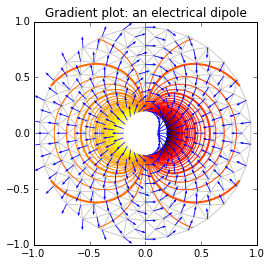

In [1]:
"""
Demonstrates computation of gradient with matplotlib.tri.CubicTriInterpolator.
"""
from matplotlib.tri import Triangulation, UniformTriRefiner,\
    CubicTriInterpolator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
%matplotlib inline


#-----------------------------------------------------------------------------
# Electrical potential of a dipole
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """ The electric dipole potential V """
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

#-----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
plt.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
               linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
plt.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
           units='xy', scale=10., zorder=3, color='blue',
           width=0.007, headwidth=3., headlength=4.)

plt.title('Gradient plot: an electrical dipole')
plt.show()

In [2]:
from tempfile import NamedTemporaryFile
from IPython.display import HTML

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [3]:
import pylab as plt
import numpy as np
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

In [4]:
# -*- coding: UTF-8 -*-
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

fig = plt.figure()

ims = []
for i in range(720):
    rad = math.radians(i)
    im = plt.scatter(math.cos(rad), math.sin(rad))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1, repeat_delay=1000)

display_animation(ani)

## おすすめの本

Python を勉強するには以下の書籍がおすすめです。AmazonのKindleで購入が可能となっています。
<img src="http://ecx.images-amazon.com/images/I/51moRIhvzhL._AA324_PIkin4,BottomRight,-47,22_AA300_SH20_OU09_.jpg">

